In [1]:
'''
    Cats and dogs classifier
'''

'\n    Cats and dogs classifier\n'

In [2]:
# hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
# hide
from fastbook import *
from fastai.vision.widgets import *
from torch.utils.data import DataLoader

In [4]:
# import dataset
from datasets import load_dataset

ds = load_dataset("cats_vs_dogs")

Found cached dataset cats_vs_dogs (/Users/anhvnguyen22/.cache/huggingface/datasets/cats_vs_dogs/default/1.0.0/d4fe9cf31b294ed8639aa58f7d8ee13fe189011837038ed9a774fde19a911fcb)


  0%|          | 0/1 [00:00<?, ?it/s]

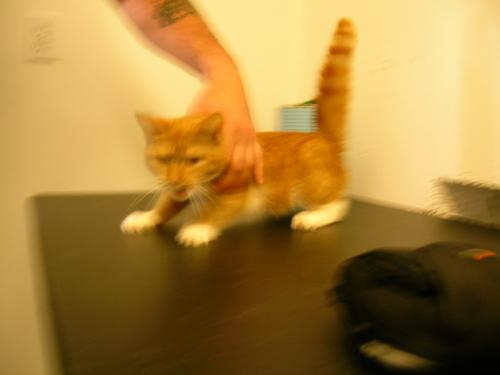

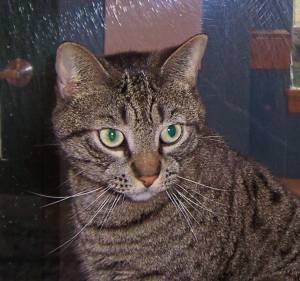

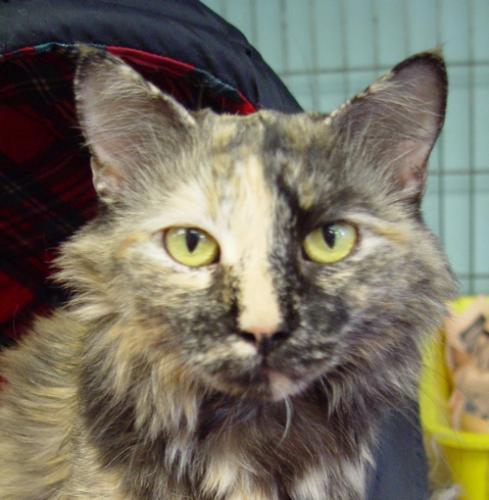

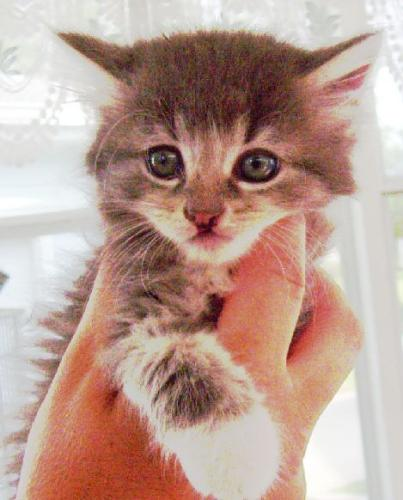

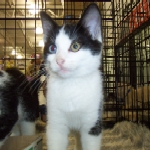

In [5]:
# get sample images
sample = [ds["train"][i]["image"] for i in range(5)]
for i in range(5):
    display(sample[i])

In [11]:
# resize to 224x224
size = 224, 224

for pic in ds["train"]:
    pic["image"].resize(size)

In [12]:
for pic in ds["train"]:
    print(pic["image"])

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x281>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=489x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=403x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x150>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=431x360>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x471>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x177>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=461x320>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=220x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=473x500>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=381x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=399x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x377>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=148x221>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=285x421>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=482x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=442x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x417>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=288x288>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=448x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=428x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=328x280>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=418x377>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=372x348>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=215x243>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x239>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x387>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=360x372>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x127>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x265>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=144x160>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=304x456>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=399x266>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x293>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x488>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x256>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x426>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x483>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x335>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=276x226>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x398>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=434x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x360>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x377>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=284x342>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=450x338>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x324>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=466x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=311x270>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x406>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x339>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=429x365>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x282>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x438>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x382>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x468>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=482x428>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=244x350>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=241x282>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x225>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x371>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x452>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x180>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=485x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=356x499>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=423x500>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=417x416>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=238x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x336>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=403x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x200>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x464>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=449x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x392>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x256>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=288x280>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=180x186>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x405>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x222>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x307>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=382x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=329x500>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x476>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=269x235>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=239x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x460>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=450x338>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x237>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=288x303>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x364>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x337>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=235x319>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x348>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x499>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=330x448>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=465x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=258x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=374x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x360>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x396>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x467>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=316x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=223x313>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=449x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x390>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=492x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=227x280>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=259x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=442x444>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x436>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=466x480>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=396x338>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x145>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=354x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=406x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x448>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=456x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=365x306>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x359>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=424x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x285>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=360x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=394x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=460x474>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x420>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=185x118>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x389>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=285x322>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x360>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x354>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=420x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=408x439>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x167>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=195x182>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x499>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x299>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=401x388>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x329>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=299x297>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x465>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x351>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x330>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=360x270>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x368>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x462>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=399x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=450x348>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x262>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=345x273>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x341>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=477x358>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=265x423>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=195x223>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=440x293>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x398>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=249x180>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=204x271>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=198x200>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x379>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x448>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x360>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=423x361>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x286>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x250>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=324x361>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=412x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=185x186>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x497>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=275x270>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x346>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=179x194>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=278x320>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=355x404>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x188>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=347x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=446x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=440x486>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x408>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=465x382>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x150>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x352>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x430>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x413>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x474>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=481x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x262>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=448x292>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x293>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x417>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x394>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=412x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=230x205>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=492x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=236x299>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x229>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x409>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=166x254>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=105x90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x225>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=448x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=450x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x225>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=451x338>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x423>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=289x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=485x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x475>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=90x112>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x236>
<PIL.JpegImagePlugin.JpegImageFile image m

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x204>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=210x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=115x175>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=270x320>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x225>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x415>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=497x270>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x318>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x250>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x381>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=275x275>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x325>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x265>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x239>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=436x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x360>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=439x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x420>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x336>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x357>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x262>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=380x400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x304>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=248x293>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=327x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=434x263>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x385>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=335x400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=369x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x413>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=338x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x287>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x424>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=427x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=338x450>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x150>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=361x414>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x370>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=492x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=448x448>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=181x180>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=288x270>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x339>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=427x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x404>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x284>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=420x247>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x201>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=428x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=383x469>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=244x295>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=429x398>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x239>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x200>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=392x383>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x371>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=288x360>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=306x196>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=312x395>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=340x260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x499>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=448x336>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=457x454>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=288x261>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=422x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=478x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=450x337>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=160x101>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x220>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=315x291>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=160x120>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=446x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x225>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=494x470>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=412x276>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=338x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=338x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=154x111>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x427>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x250>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x343>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=174x247>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x440>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=360x270>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=402x426>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x401>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=388x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x192>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=366x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x471>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=359x352>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x420>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x379>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x394>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x372>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=276x226>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x426>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=403x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x163>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x180>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x302>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x319>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x209>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=437x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x380>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x407>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=467x414>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=146x194>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x150>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=186x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x382>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x332>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=473x470>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=432x450>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=341x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x252>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x481>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=266x270>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=379x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x147>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=378x301>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=360x270>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=321x400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=210x297>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x298>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=484x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x225>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x398>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=233x270>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=315x317>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x408>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=305x311>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=288x432>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x315>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=385x385>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x213>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x332>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x359>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=185x159>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=284x380>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=287x320>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=346x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=334x415>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=133x200>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x373>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x363>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x223>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=376x440>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=317x400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x479>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=490x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=469x314>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=264x284>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=392x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x262>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=170x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=243x180>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=373x277>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=307x338>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=329x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=482x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=354x318>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x478>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=107x103>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x376>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=314x483>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x182>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=462x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x262>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=295x208>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x309>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x490>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=418x379>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x394>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x266>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x379>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x442>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=401x500>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=402x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x347>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=321x303>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=184x138>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=432x339>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=275x275>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=192x124>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x417>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x233>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x262>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x289>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x254>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=268x447>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x331>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x487>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=310x475>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=422x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=458x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=388x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x477>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=191x169>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=338x400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=351x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=380x298>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=257x473>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=314x210>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x437>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x427>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=258x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x318>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x311>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=391x336>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=410x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x358>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x225>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=462x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x295>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=147x144>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x273>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x225>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x148>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=388x207>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x199>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=360x323>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x372>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=429x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=299x448>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x336>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=471x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=288x432>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x414>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x288>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=308x326>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=202x270>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=198x132>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=413x496>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x420>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x401>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x338>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x411>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x427>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=471x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x291>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x304>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x344>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=355x270>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=267x432>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x414>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x421>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x446>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=248x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x288>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x252>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=332x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x237>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x262>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=298x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x304>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=180x177>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=292x173>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=353x500>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=340x260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x391>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x314>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x225>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x235>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x353>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x247>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x301>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=288x260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x487>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x291>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x466>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=477x480>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=411x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x497>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x258>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=399x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=311x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x399>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x242>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=440x460>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=422x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=167x125>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x424>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x250>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=271x357>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x262>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x357>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x439>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=263x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x339>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x266>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x187>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x382>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x181>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x222>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x366>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=343x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x199>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x312>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x262>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=141x175>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=360x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x224>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x360>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=450x420>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x476>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x258>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x432>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=288x249>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=233x175>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x346>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x148>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=445x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=239x199>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=432x288>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=349x275>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=431x500>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x305>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x382>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x338>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=496x299>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=372x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=293x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=411x252>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=348x176>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x297>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x457>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=239x187>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=284x400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=334x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x262>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x451>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=125x124>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=199x296>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x206>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=332x500>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x434>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x392>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x391>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=188x142>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=288x217>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x410>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x379>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=364x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x258>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x395>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x448>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=495x397>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=349x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=419x500>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=432x290>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=346x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x225>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=192x188>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x219>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x381>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=419x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x366>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=357x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x262>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=419x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=318x349>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x360>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x188>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=353x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=361x238>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x252>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x362>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=245x201>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=475x356>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x308>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x339>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=450x364>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=160x120>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=427x399>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=334x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x434>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=442x480>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x467>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x499>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x339>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=303x350>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=236x250>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x364>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x378>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=440x413>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=379x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x353>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x302>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=424x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x280>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x467>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x410>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=448x299>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=360x270>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x364>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x350>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x399>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x366>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=426x287>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x438>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x411>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x469>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=330x444>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x330>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x449>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x186>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=325x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=288x343>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x456>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x374>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=450x338>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=422x434>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=307x349>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=327x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=237x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x314>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=481x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x346>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=382x452>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=277x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=233x191>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x434>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x398>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x415>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x369>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x350>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=124x87>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x288>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x410>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x314>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=216x203>
<PIL.JpegImagePlugin.JpegImageFile image 

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=407x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=288x290>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x309>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=450x338>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=442x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=423x334>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=490x490>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x379>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x432>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x384>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x431>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x434>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=431x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x496>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x391>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=481x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x298>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x448>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=450x484>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x280>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x380>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=151x180>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=495x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x253>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x337>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x475>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=131x212>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x338>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x225>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=235x100>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=275x275>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=313x313>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=409x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x199>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=486x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x332>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=458x233>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=356x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x481>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=447x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x342>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x451>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x100>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=392x444>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=466x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x332>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x494>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x348>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x384>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=318x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x225>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x365>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x126>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=279x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x150>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=460x256>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x479>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=216x216>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x331>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=410x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=446x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=340x334>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=226x175>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=305x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=409x441>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=447x402>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=490x397>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x285>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x447>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=395x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x476>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=236x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=319x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x456>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x329>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=118x150>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=367x345>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x445>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=422x499>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x286>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x409>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=448x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=409x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=231x150>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x225>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=486x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x423>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=472x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x332>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x476>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=180x230>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=410x307>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=398x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=305x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x262>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x332>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x432>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=303x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=193x270>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=236x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=321x322>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=452x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=360x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x364>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=487x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=360x480>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=493x380>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x463>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x356>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=360x302>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=498x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x301>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=153x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=462x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x445>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=406x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=428x389>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=374x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x332>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=241x334>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x294>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=410x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=360x270>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=246x222>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=387x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=344x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=440x268>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x483>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x340>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x489>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=392x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=365x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x468>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=216x389>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=290x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x374>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=318x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x458>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x225>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x385>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x347>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=160x120>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=415x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x304>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=339x408>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x377>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=88x131>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=264x232>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=396x297>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=293x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=315x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=376x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=397x500>
<PIL.JpegImagePlugin.JpegImageFile image 

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x374>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x260>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=167x125>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x332>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x262>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=249x250>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=361x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=367x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=316x287>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x108>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x498>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=464x500>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=357x336>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x418>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=218x426>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x458>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=234x273>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x358>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x301>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=471x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=391x450>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x245>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x380>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=436x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=389x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=360x270>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=305x400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x394>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=355x404>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=496x500>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=423x332>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x376>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x299>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=489x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=326x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=311x384>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=314x235>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=195x156>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=302x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x371>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=417x500>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=406x312>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x262>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x374>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x478>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x281>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x200>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x388>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=185x164>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=421x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=422x463>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=324x500>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x425>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x182>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=427x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=356x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x262>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x438>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=399x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x338>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=464x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=349x463>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=358x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=464x292>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=457x497>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=363x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x263>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=367x470>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=314x209>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=176x199>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x73>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x362>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=371x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=343x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x377>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x359>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=399x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x488>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x199>
<PIL.JpegImagePlugin.JpegImageFile image 

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x332>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x267>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=221x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=216x433>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=173x261>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=425x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x489>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x314>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=248x363>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x262>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=470x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x187>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=348x400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=70x52>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x397>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x360>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x480>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=289x446>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=329x425>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x453>
<PIL.JpegImagePlugin.JpegImageFile image m

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=219x342>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=403x324>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x360>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x498>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x377>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=450x327>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=434x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x418>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=357x488>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x379>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=177x276>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x360>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=436x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x424>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=491x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=366x400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x360>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=351x399>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=444x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x332>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=386x289>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x457>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x225>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=457x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=288x216>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=395x267>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=191x192>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=420x427>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=232x232>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=115x115>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=160x123>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=499x374>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=294x448>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=286x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=448x336>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=432x488>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x252>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=163x197>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=358x257>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x393>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=153x222>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x239>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=278x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=415x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=155x200>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x461>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=252x245>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=203x224>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x416>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=119x98>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=247x280>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=282x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x385>
<PIL.JpegImagePlugin.JpegImageFile image 

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x353>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x384>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x320>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=497x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=280x270>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x200>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=341x247>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x471>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=364x355>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=323x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x377>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=142x172>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=364x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=448x336>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x386>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=411x500>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=424x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=385x331>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=250x227>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x325>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x294>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x338>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=387x268>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x419>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=191x288>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=346x407>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=411x417>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x297>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=360x327>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=436x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=97x150>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=355x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=364x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=295x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=192x149>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x416>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x262>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x456>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x440>
<PIL.JpegImagePlugin.JpegImageFile image 

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=450x442>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x372>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x448>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x418>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=455x480>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x192>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x348>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x332>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=233x175>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=411x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x254>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=290x433>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=180x135>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x369>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x439>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x457>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x369>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x446>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=58x50>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x434>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=377x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=423x422>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=160x200>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x167>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x407>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=477x400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=467x401>
<PIL.JpegImagePlugin.JpegImageFile image m

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x339>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x423>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x175>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x429>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=294x403>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x470>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x332>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x150>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x356>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x360>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x297>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x315>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=329x400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x440>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=490x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x450>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x431>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=446x480>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=360x360>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x254>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=252x250>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=155x201>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x370>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x332>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x467>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x461>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=216x204>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x393>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x476>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=288x186>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x352>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=333x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=227x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=252x228>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=188x200>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=370x480>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x323>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x351>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=356x422>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x378>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=380x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=260x232>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x262>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=435x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=301x379>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x288>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=416x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x360>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=253x250>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=299x237>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=358x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=448x336>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x464>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x372>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x466>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=430x410>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=325x356>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=356x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=301x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x218>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=304x400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x467>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=318x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x448>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x290>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x480>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=266x400>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=235x287>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=217x270>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=136x221>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x300>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=174x189>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=489x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=284x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=323x273>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x184>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x252>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=312x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=409x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x440>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=365x336>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=241x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x240>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=493x500>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x367>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=331x500>
<PIL.JpegImagePlugin.JpegImageFile image

KeyboardInterrupt: 

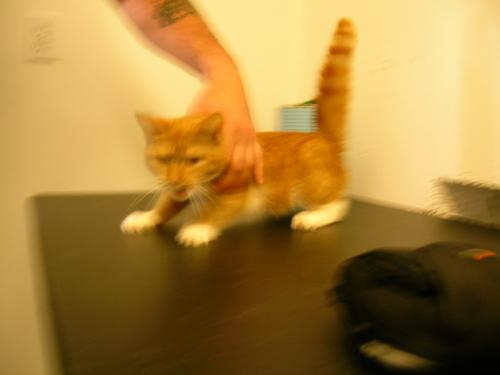

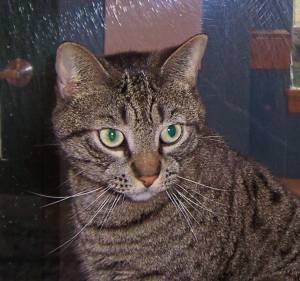

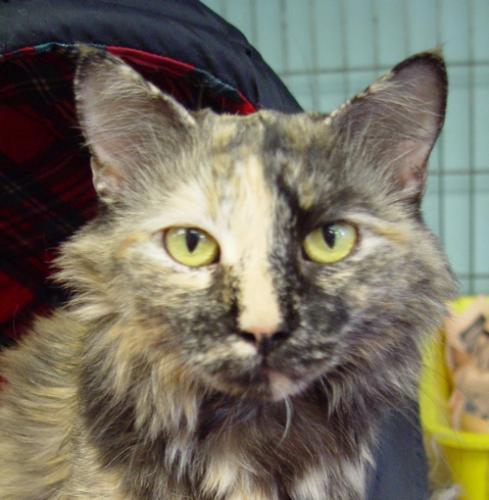

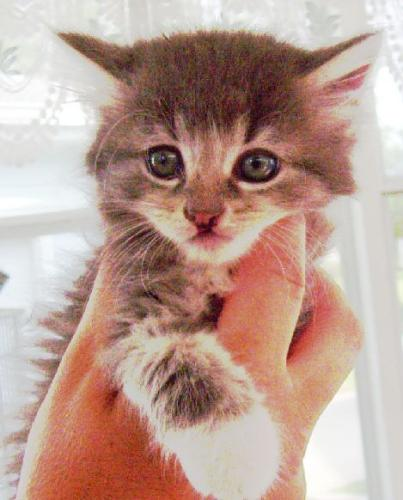

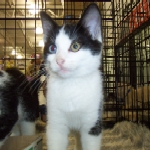

In [13]:
# get sample images
resized_sample = [ds["train"][i]["image"] for i in range(5)]
for i in range(5):
    display(resized_sample[i])

In [19]:
# 10% image for test
ds = ds["train"].train_test_split(test_size=0.1).with_format('torch')
print(ds)

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 15358
    })
    test: Dataset({
        features: ['image', 'labels'],
        num_rows: 1707
    })
})


tensor([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [26]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 15358
    })
    test: Dataset({
        features: ['image', 'labels'],
        num_rows: 1707
    })
})

In [16]:
train_set = ds["train"]
test_set = ds["test"]
    

num_to_label = {
    0: "cat",
    1: "dog",
}

In [ ]:
train_set.set_format('torch')

In [ ]:
train_loader = DataLoader(train_set, batch_size=4)
for batch in train_loader:
    print(batch)

In [ ]:
# turn HuggingFace Dataset to Torch DataLoader
ds = dataset
train_loader = DataLoader(train_set.with_format('torch'), batch_size=4, shuffle=True)
test_loader = DataLoader(test_set.with_format('torch'), batch_size=4, shuffle=True)


In [ ]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")